In [1]:
# Importing Libraries

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import time
import numpy as np
import seaborn as sns

from tqdm import tqdm
from prettytable import PrettyTable
from scipy.sparse import hstack
from xgboost import XGBRegressor

from statsmodels.tools.tools import add_constant
from statsmodels.regression.linear_model import OLS

from sklearn.preprocessing import Normalizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout

C:\Users\hp\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\hp\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\hp\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\hp\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:529: FutureWarning: Passing (type, 1)

In [2]:
# Loading data
# Dataset Link: https://www.hackerearth.com/challenges/competitive/hackerearth-machine-learning-challenge-air-pollution-index-prediction/
data = pd.read_csv('dataset/train.csv')
data.shape

(33750, 14)

In [3]:
data.head() 

,date_time,is_holiday,humidity,wind_speed,wind_direction,visibility_in_miles,dew_point,temperature,rain_p_h,snow_p_h,clouds_all,weather_type,air_pollution_index,traffic_volume
0,2012-10-02 09:00:00,None,89,2,329,1,1,288.28,0.0,0.0,40,Clouds,121,5545
1,2012-10-02 10:00:00,None,67,3,330,1,1,289.36,0.0,0.0,75,Clouds,178,4516
2,2012-10-02 11:00:00,None,66,3,329,2,2,289.58,0.0,0.0,90,Clouds,113,4767
3,2012-10-02 12:00:00,None,66,3,329,5,5,290.13,0.0,0.0,90,Clouds,20,5026
4,2012-10-02 13:00:00,None,65,3,329,7,7,291.14,0.0,0.0,75,Clouds,281,4918


In [4]:
data.describe()

,humidity,wind_speed,wind_direction,visibility_in_miles,dew_point,temperature,rain_p_h,snow_p_h,clouds_all,air_pollution_index,traffic_volume
count,33750.000000,33750.000000,33750.000000,33750.000000,33750.000000,33750.000000,33750.000000,33750.000000,33750.000000,33750.000000,33750.000000
mean,71.209007,3.378193,199.471852,4.989748,4.989748,280.069587,0.448739,0.000318,50.458785,154.841422,3240.118163
std,16.852248,2.055792,99.841088,2.570021,2.570021,13.415256,53.526500,0.009760,38.871734,83.735515,1991.487289
min,13.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,10.000000,0.000000
25%,60.000000,2.000000,130.000000,3.000000,3.000000,271.720000,0.000000,0.000000,1.000000,83.000000,1165.250000
50%,72.000000,3.000000,200.000000,5.000000,5.000000,280.150000,0.000000,0.000000,64.000000,155.000000,3335.000000
75%,85.000000,5.000000,290.000000,7.000000,7.000000,290.620000,0.000000,0.000000,90.000000,228.000000,4926.000000
max,100.000000,16.000000,360.000000,9.000000,9.000000,308.240000,9831.300000,0.510000,100.000000,299.000000,7280.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33750 entries, 0 to 33749
Data columns (total 14 columns):
date_time              33750 non-null object
is_holiday             33750 non-null object
humidity               33750 non-null int64
wind_speed             33750 non-null int64
wind_direction         33750 non-null int64
visibility_in_miles    33750 non-null int64
dew_point              33750 non-null int64
temperature            33750 non-null float64
rain_p_h               33750 non-null float64
snow_p_h               33750 non-null float64
clouds_all             33750 non-null int64
weather_type           33750 non-null object
air_pollution_index    33750 non-null int64
traffic_volume         33750 non-null int64
dtypes: float64(3), int64(8), object(3)
memory usage: 3.6+ MB


In [6]:
# Checking for duplicate rows

result = data.duplicated().any()
if result == True:
    print('There are Duplicates')
else:
    print('There are no Duplicates')

There are no Duplicates


# 1. Data Analysis and Visulaization

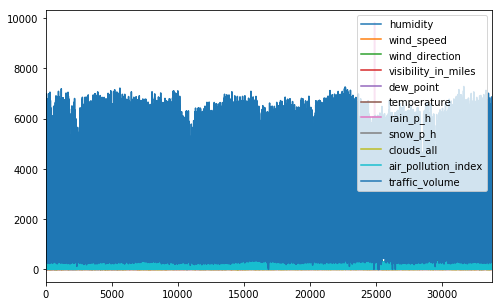

In [7]:
data.plot(figsize=(8, 5))
plt.show()

## 1.1 is_holiday

In [8]:
data['is_holiday'].describe()

count     33750
unique       12
top        None
freq      33707
Name: is_holiday, dtype: object

In [9]:
data['is_holiday'].unique()

array(['None', 'Columbus Day', 'Veterans Day', 'Thanksgiving Day',
       'Christmas Day', 'New Years Day', 'Washingtons Birthday',
       'Memorial Day', 'Independence Day', 'State Fair', 'Labor Day',
       'Martin Luther King Jr Day'], dtype=object)

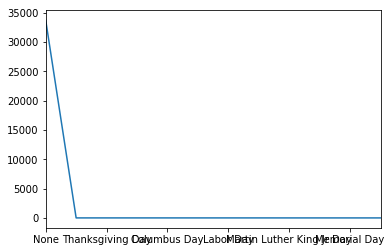

In [10]:
data['is_holiday'].value_counts().plot()
plt.show()

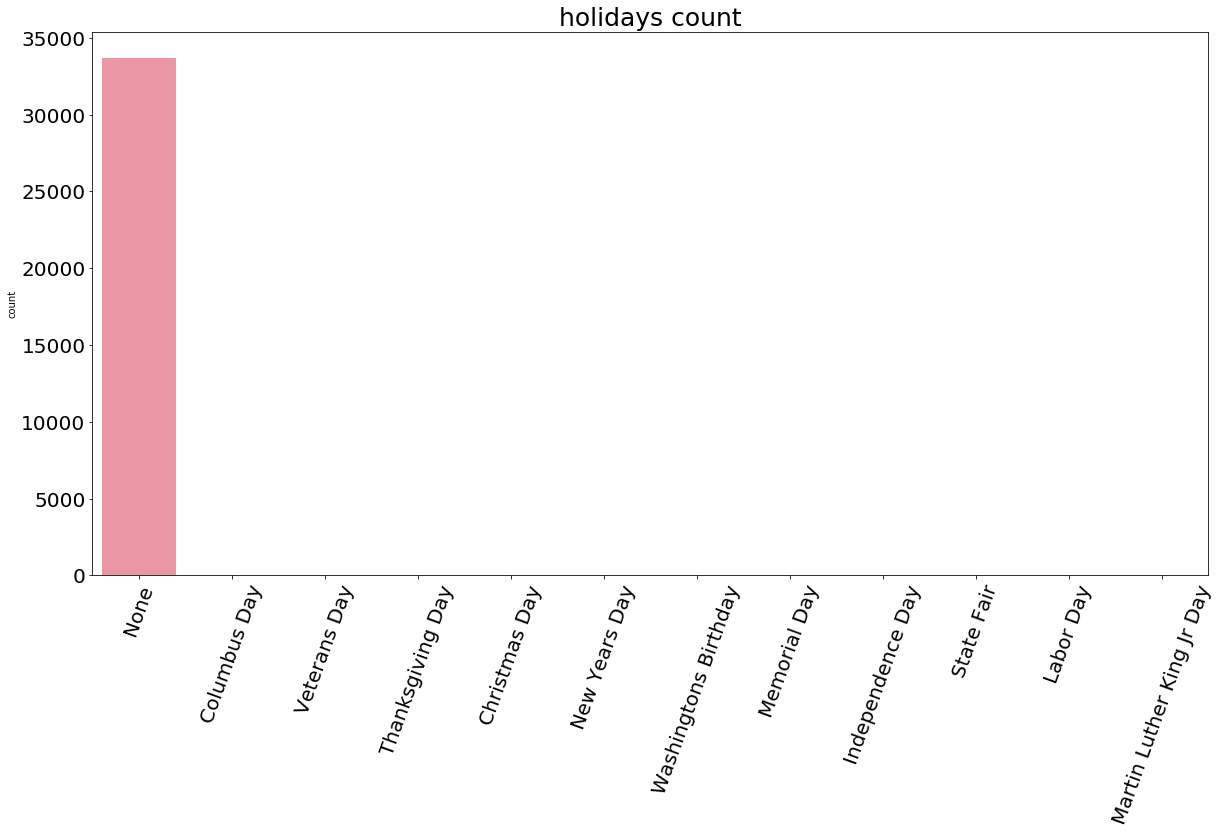

In [11]:
# Plotting
fig, ax = plt.subplots(figsize=(20,10))
sns.countplot(x='is_holiday', data=data, ax=ax)
plt.title('holidays count',fontsize=25)
plt.xlabel('')
plt.xticks(rotation=70,fontsize=20)
plt.yticks(fontsize=20)
plt.show()

Most of the values are None. Only few values have holiday name. 
Since there are only few holidays, We can change all those holidays names in to 'holiday'

In [13]:
holidays_list = ['Christmas Day', 'Thanksgiving Day', 'New Years Day', 'Columbus Day', 'Veterans Day', 'Labor Day', \
                'Washingtons Birthday', 'Memorial Day', 'State Fair', 'Martin Luther King Jr Day', 'Independence Day']


data['is_holiday'] = data['is_holiday'].replace(holidays_list, 'Holiday')

In [14]:
data['is_holiday'].unique()

array(['None', 'Holiday'], dtype=object)

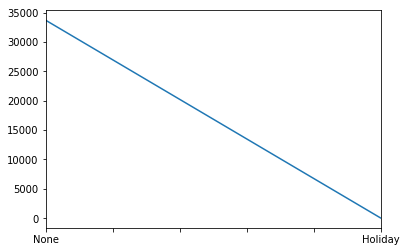

In [15]:
data['is_holiday'].value_counts().plot()
plt.show()

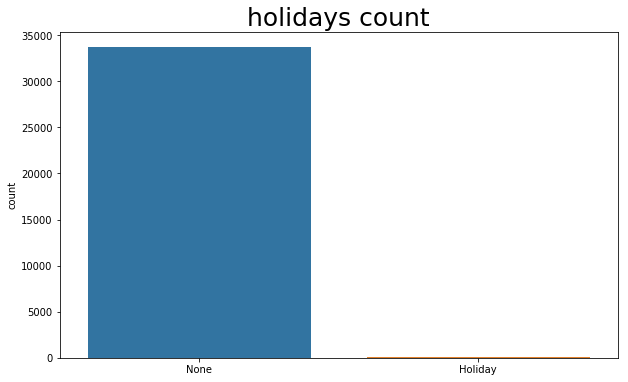

In [16]:
# Plotting
fig, ax = plt.subplots(figsize=(10,6))
sns.countplot(x='is_holiday', data=data, ax=ax)
plt.title('holidays count',fontsize=25)
plt.xlabel('')
plt.show()

Almost all the values are 'None'

## 1.2 humidity

In [17]:
data['humidity'].head()

0    89
1    67
2    66
3    66
4    65
Name: humidity, dtype: int64

In [18]:
data['humidity'].describe()

count    33750.000000
mean        71.209007
std         16.852248
min         13.000000
25%         60.000000
50%         72.000000
75%         85.000000
max        100.000000
Name: humidity, dtype: float64

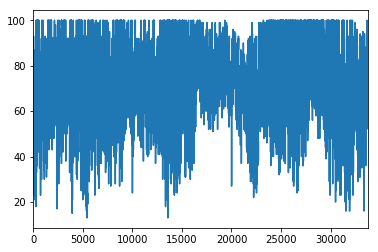

In [19]:
data['humidity'].plot()
plt.show()

There are only few points which are less than 20

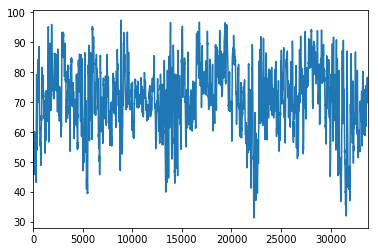

In [20]:
data['humidity'].rolling(50).mean().plot()
plt.show()

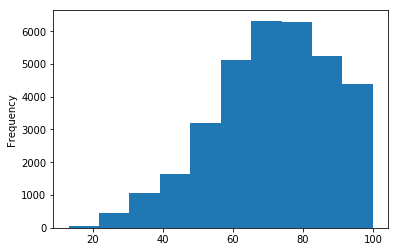

In [21]:
# Histogram

data['humidity'].plot(kind='hist')
plt.show()

Humidity has a highly right-skewed distribution

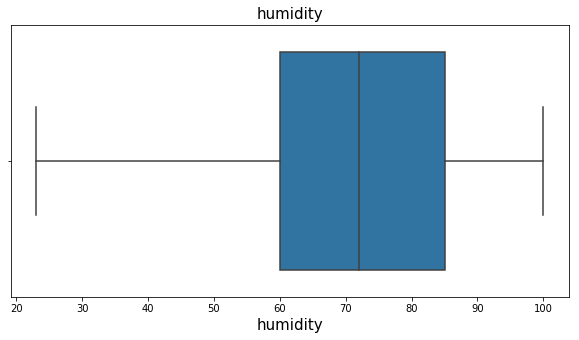

In [22]:
#Box-plot
fig, ax = plt.subplots(figsize=(10,5))
plt.title('humidity', fontsize=15)
sns.boxplot(data['humidity'],showfliers=False)
ax.set_xlabel('humidity',fontsize=15)

plt.show()

Most of the values lie between 80 and 86

## 1.3 wind_speed

In [23]:
data['wind_speed'].head()

0    2
1    3
2    3
3    3
4    3
Name: wind_speed, dtype: int64

In [24]:
data['wind_speed'].describe()

count    33750.000000
mean         3.378193
std          2.055792
min          0.000000
25%          2.000000
50%          3.000000
75%          5.000000
max         16.000000
Name: wind_speed, dtype: float64

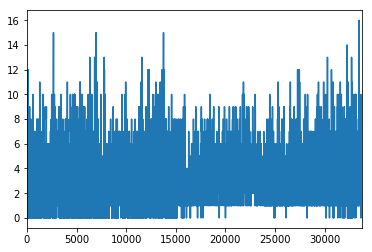

In [25]:
data['wind_speed'].plot()
plt.show()

In most of the cases, 'wind_speed' is less than 10

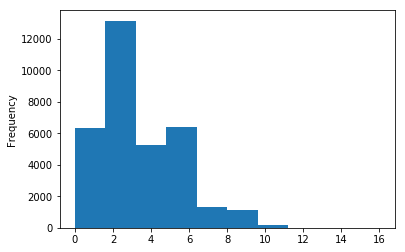

In [26]:
# Histogram

data['wind_speed'].plot(kind='hist')
plt.show()

Wind_speed has left-skewed distribution

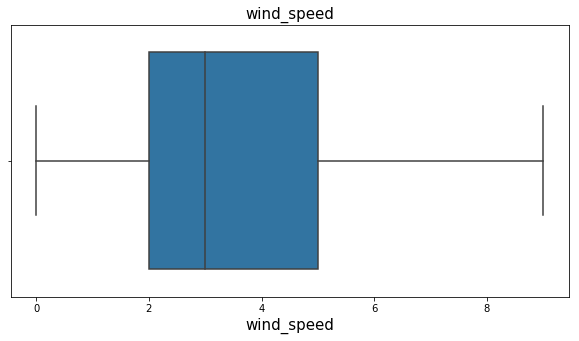

In [27]:
#Box-plot
fig, ax = plt.subplots(figsize=(10,5))
plt.title('wind_speed', fontsize=15)
sns.boxplot(data['wind_speed'],showfliers=False)
ax.set_xlabel('wind_speed',fontsize=15)

plt.show()

Most of the wind speed values lie between 4 and 5

## 1.4 wind_direction

In [28]:
data['wind_direction'].head()

0    329
1    330
2    329
3    329
4    329
Name: wind_direction, dtype: int64

In [29]:
data['wind_direction'].describe()

count    33750.000000
mean       199.471852
std         99.841088
min          0.000000
25%        130.000000
50%        200.000000
75%        290.000000
max        360.000000
Name: wind_direction, dtype: float64

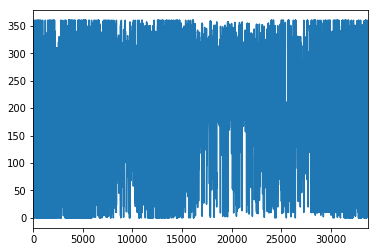

In [30]:
data['wind_direction'].plot()
plt.show()

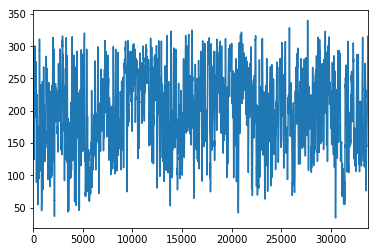

In [31]:
data['wind_direction'].rolling(50).mean().plot()
plt.show()

There are only few points which are less than 70 and there are only few points which are greater than 320

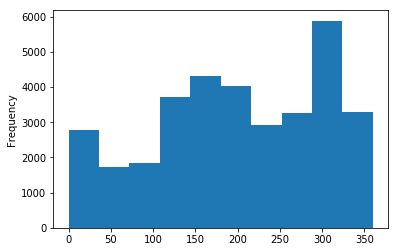

In [32]:
# Histogram

data['wind_direction'].plot(kind='hist')
plt.show()

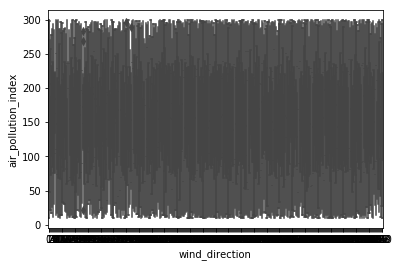

In [33]:
#Boxplot wind_direction vs air_pollution_index
sns.boxplot(x=data['wind_direction'],y=data['air_pollution_index'] ,orient='v')
plt.show()

The above box-plot is not at all interpretable

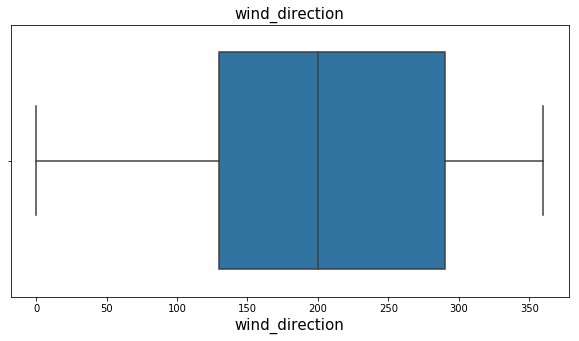

In [45]:
#Box-plot
fig, ax = plt.subplots(figsize=(10,5))
plt.title('wind_direction', fontsize=15)
sns.boxplot(data['wind_direction'],showfliers=False)
ax.set_xlabel('wind_direction',fontsize=15)

plt.show()

Most of the values lie between 250 and 280

## 1.5 visibility_in_miles

In [34]:
data['visibility_in_miles'].head()

0    1
1    1
2    2
3    5
4    7
Name: visibility_in_miles, dtype: int64

In [35]:
data['visibility_in_miles'].describe()

count    33750.000000
mean         4.989748
std          2.570021
min          1.000000
25%          3.000000
50%          5.000000
75%          7.000000
max          9.000000
Name: visibility_in_miles, dtype: float64

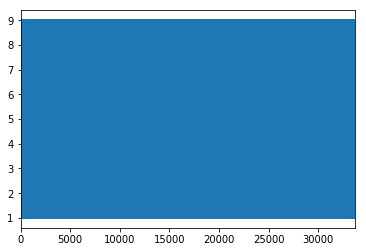

In [36]:
data['visibility_in_miles'].plot()
plt.show()

The above plot is not at all interpretable

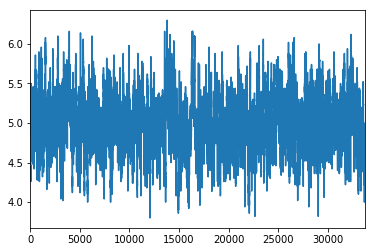

In [37]:
data['visibility_in_miles'].rolling(50).mean().plot()
plt.show()

Most of the points lie between 4.5 and 5.5

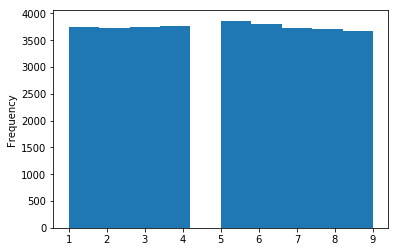

In [38]:
# Histogram

data['visibility_in_miles'].plot(kind='hist')
plt.show()

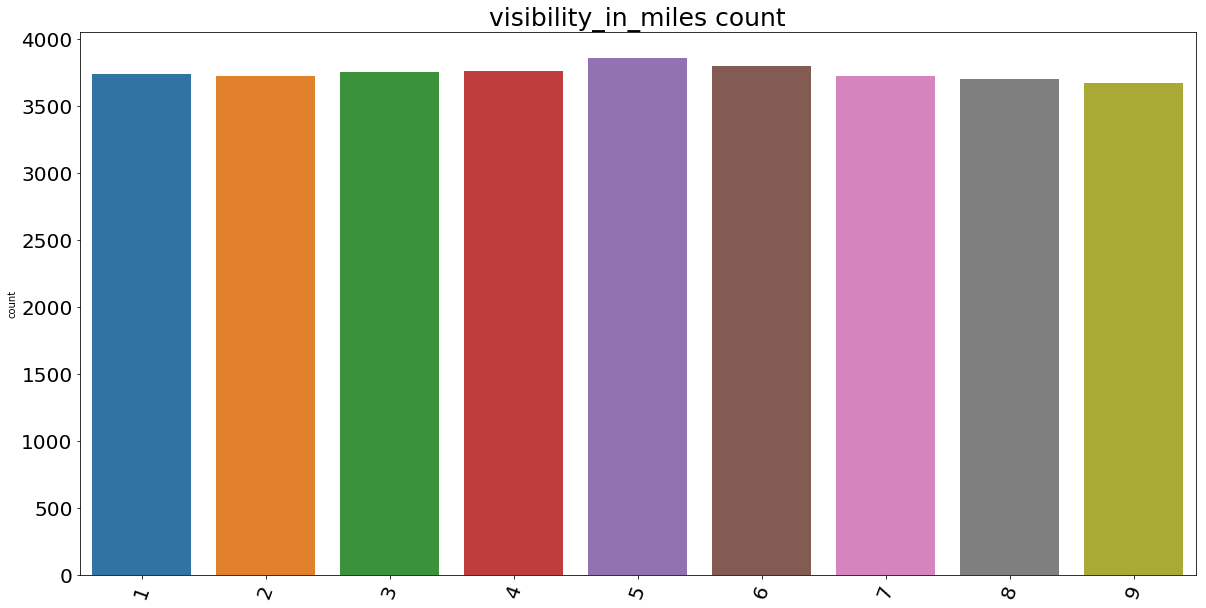

In [39]:
# Plotting
fig, ax = plt.subplots(figsize=(20,10))
sns.countplot(x='visibility_in_miles', data=data, ax=ax)
plt.title('visibility_in_miles count',fontsize=25)
plt.xlabel('')
plt.xticks(rotation=70,fontsize=20)
plt.yticks(fontsize=20)
plt.show()

## 1.6 dew_point

In [40]:
data['dew_point'].head()

0    1
1    1
2    2
3    5
4    7
Name: dew_point, dtype: int64

In [41]:
data['dew_point'].describe()

count    33750.000000
mean         4.989748
std          2.570021
min          1.000000
25%          3.000000
50%          5.000000
75%          7.000000
max          9.000000
Name: dew_point, dtype: float64

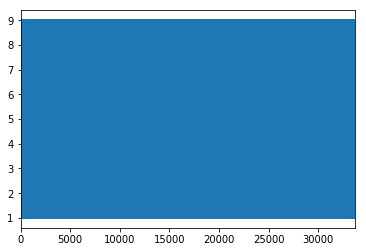

In [42]:
data['dew_point'].plot()
plt.show()

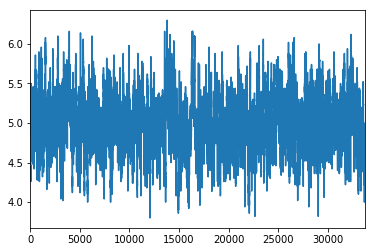

In [43]:
data['dew_point'].rolling(50).mean().plot()
plt.show()

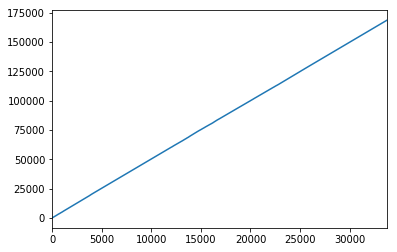

In [44]:
# PDF
new = data['dew_point'].cumsum()
new.plot()
plt.show()

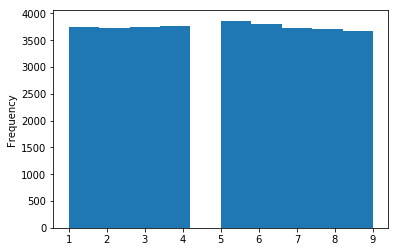

In [45]:
# Histogram
data['dew_point'].plot(kind='hist')
plt.show()

Both dew_point and visibility_in_miles has the similar kind of distribution

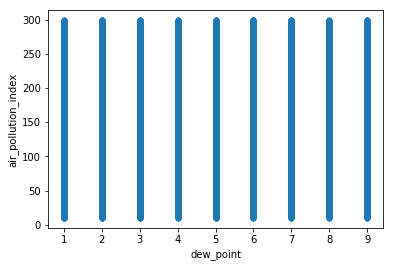

In [46]:
# Scatter plot: dew_point vs air_pollution_index

data.plot.scatter(x='dew_point', y='air_pollution_index')
plt.show()

## 1.7 temperature

In [47]:
data['temperature'].head()

0    288.28
1    289.36
2    289.58
3    290.13
4    291.14
Name: temperature, dtype: float64

In [48]:
data['temperature'].describe()

count    33750.000000
mean       280.069587
std         13.415256
min          0.000000
25%        271.720000
50%        280.150000
75%        290.620000
max        308.240000
Name: temperature, dtype: float64

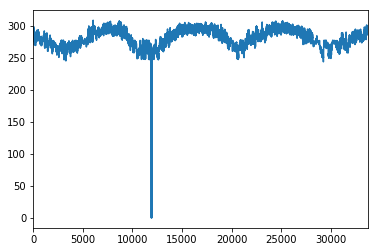

In [49]:
data['temperature'].plot()
plt.show()

Most of the temperature values lies in between 250 and 300

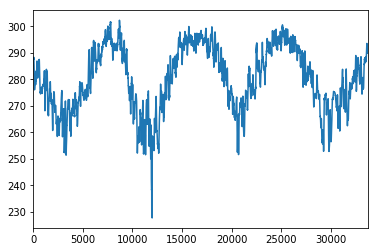

In [50]:
data['temperature'].rolling(50).mean().plot()
plt.show()

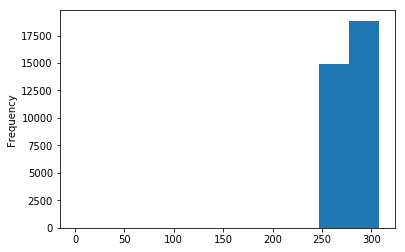

In [51]:
# Histogram 

data['temperature'].plot(kind='hist')
plt.show()

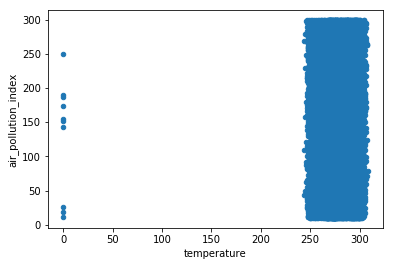

In [52]:
# Scatter plot: temperature vs air_pollution_index

data.plot.scatter(x='temperature', y='air_pollution_index')
plt.show()

## 1.8 rain_p_h

In [53]:
data['rain_p_h'].head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: rain_p_h, dtype: float64

In [54]:
data['rain_p_h'].describe()

count    33750.000000
mean         0.448739
std         53.526500
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       9831.300000
Name: rain_p_h, dtype: float64

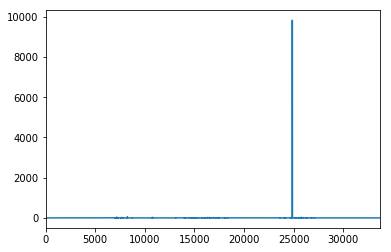

In [55]:
data['rain_p_h'].plot()
plt.show()

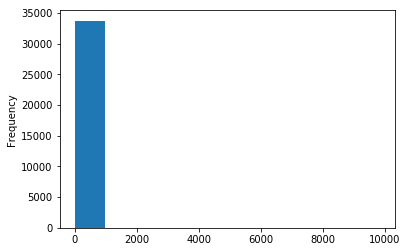

In [56]:
# Histogram

data['rain_p_h'].plot(kind='hist')
plt.show()

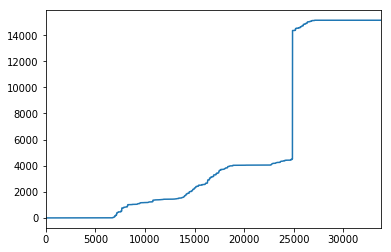

In [57]:
# PDF
new = data['rain_p_h'].cumsum()
new.plot()
plt.show()

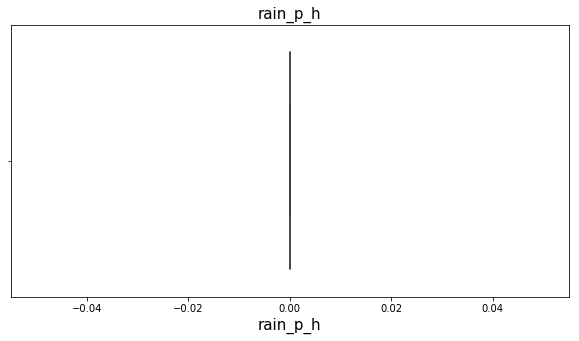

In [58]:
#Box-plot
fig, ax = plt.subplots(figsize=(10,5))
plt.title('rain_p_h', fontsize=15)
sns.boxplot(data['rain_p_h'],showfliers=False)
ax.set_xlabel('rain_p_h',fontsize=15)

plt.show()

25 percentile, 50 percentile, 75 percentile values are '0'

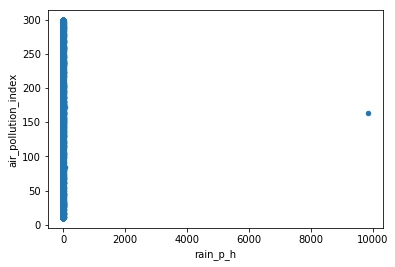

In [59]:
# Scatter plot: temperature vs air_pollution_index

data.plot.scatter(x='rain_p_h', y='air_pollution_index')
plt.show()

In this column 'rain_p_h' most of the values are '0'

## 1.9 snow_p_h

In [60]:
data['snow_p_h'].head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: snow_p_h, dtype: float64

In [61]:
data['snow_p_h'].describe()

count    33750.000000
mean         0.000318
std          0.009760
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          0.510000
Name: snow_p_h, dtype: float64

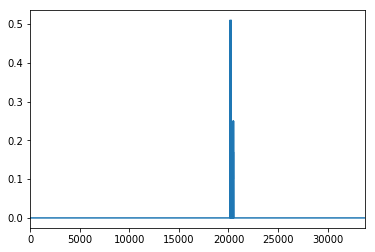

In [62]:
data['snow_p_h'].plot()
plt.show()

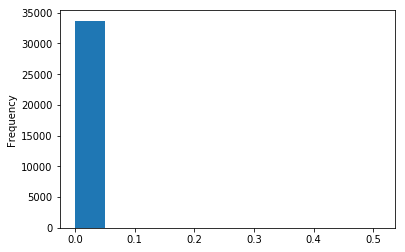

In [63]:
# Histogram
data['snow_p_h'].plot(kind='hist')
plt.show()

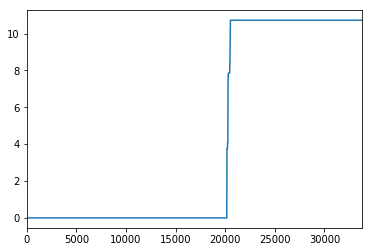

In [64]:
# PDF
new = data['snow_p_h'].cumsum()
new.plot()
plt.show()

From the above plot we can see that almost 20000 values are '0'

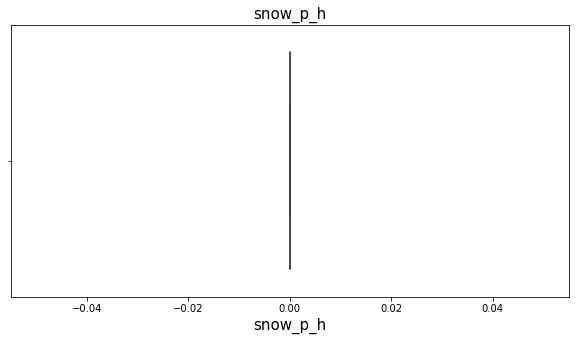

In [65]:
#Box-plot
fig, ax = plt.subplots(figsize=(10,5))
plt.title('snow_p_h', fontsize=15)
sns.boxplot(data['snow_p_h'],showfliers=False)
ax.set_xlabel('snow_p_h',fontsize=15)

plt.show()

From above box-plot we can see, there's no box. It means 25, 50, 75 percentile values are all zeors

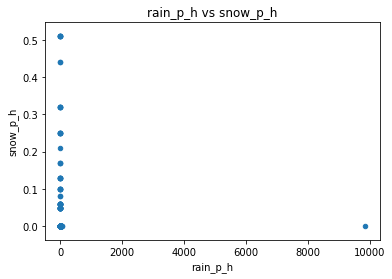

In [66]:
# Scatter plot: rain_p_h vs snow_p_h

data.plot.scatter(x='rain_p_h', y='snow_p_h')
plt.title('rain_p_h vs snow_p_h')
plt.show()

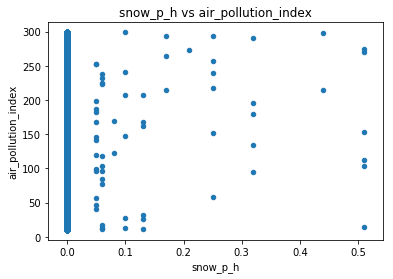

In [67]:
# Scatter plot: snow_p_h vs air_pollution_index

data.plot.scatter(x='snow_p_h', y='air_pollution_index')
plt.title('snow_p_h vs air_pollution_index')
plt.show()

## 1.10 clouds_all

In [68]:
data['clouds_all'].head()

0    40
1    75
2    90
3    90
4    75
Name: clouds_all, dtype: int64

In [69]:
data['clouds_all'].describe()

count    33750.000000
mean        50.458785
std         38.871734
min          0.000000
25%          1.000000
50%         64.000000
75%         90.000000
max        100.000000
Name: clouds_all, dtype: float64

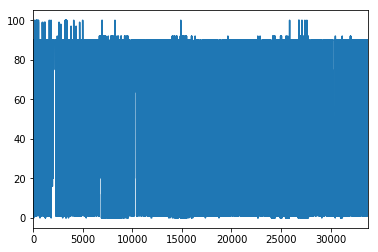

In [70]:
data['clouds_all'].plot()
plt.show()

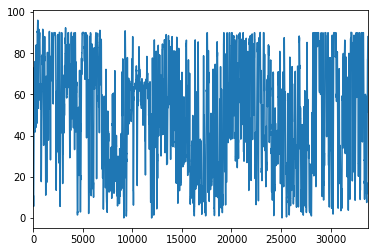

In [71]:
data['clouds_all'].rolling(50).mean().plot()
plt.show()

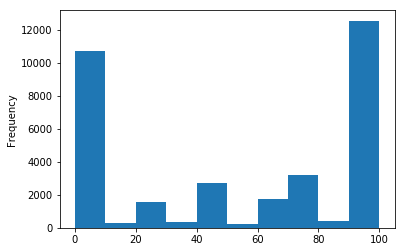

In [72]:
# Histogram
data['clouds_all'].plot(kind='hist')
plt.show()

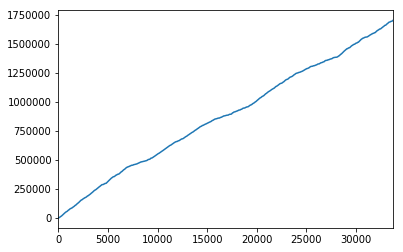

In [73]:
# PDF
new = data['clouds_all'].cumsum()
new.plot()
plt.show()

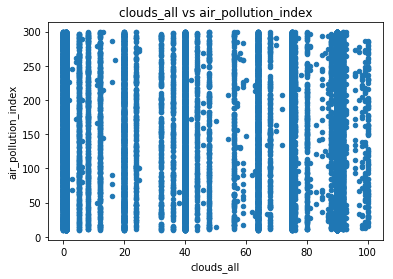

In [74]:
# Scatter plot: clouds_all vs air_pollution_index

data.plot.scatter(x='clouds_all', y='air_pollution_index')
plt.title('clouds_all vs air_pollution_index')
plt.show()

## 1.11 weather_type

In [75]:
data['weather_type'].head()

0    Clouds
1    Clouds
2    Clouds
3    Clouds
4    Clouds
Name: weather_type, dtype: object

In [76]:
data['weather_type'].describe()

count      33750
unique        11
top       Clouds
freq       11213
Name: weather_type, dtype: object

In [77]:
data['weather_type'].unique()

array(['Clouds', 'Clear', 'Rain', 'Drizzle', 'Mist', 'Haze', 'Fog',
       'Thunderstorm', 'Snow', 'Squall', 'Smoke'], dtype=object)

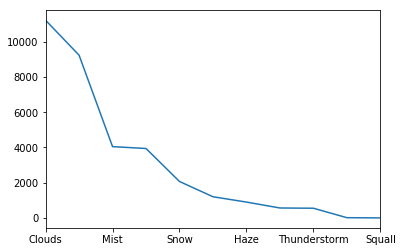

In [78]:
data['weather_type'].value_counts().plot()
plt.show()

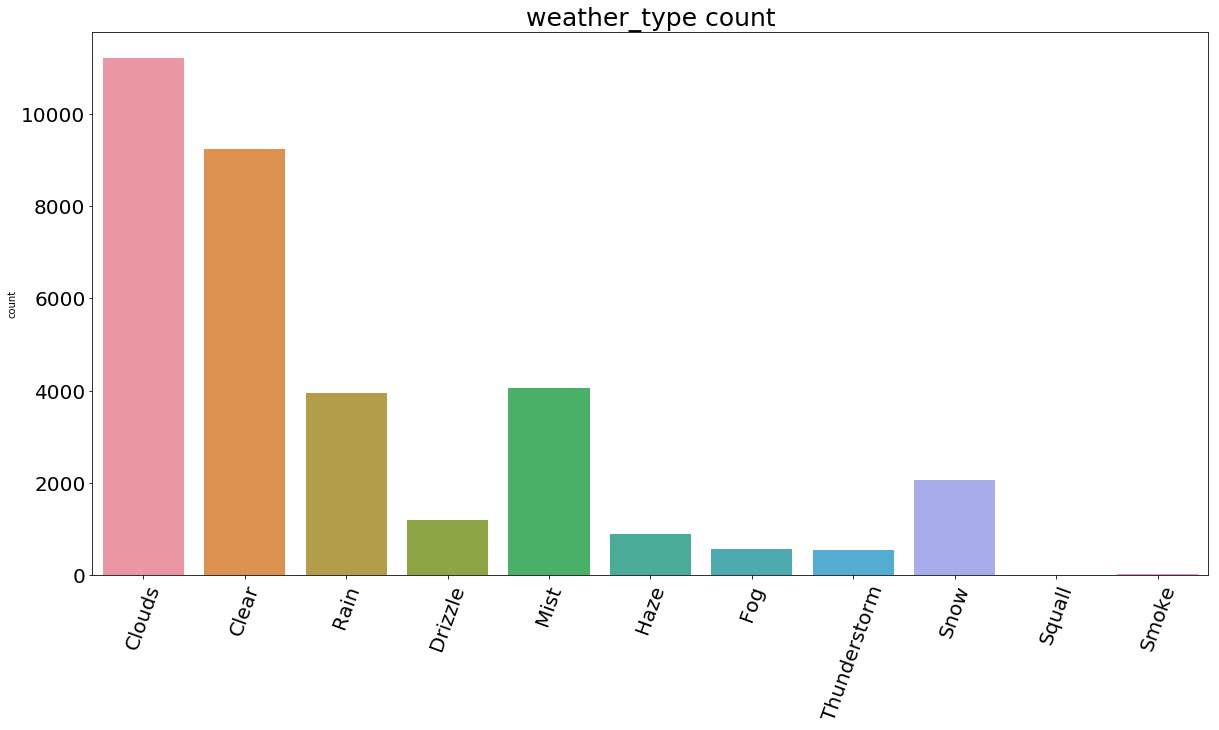

In [79]:
# Plotting
fig, ax = plt.subplots(figsize=(20,10))
sns.countplot(x='weather_type', data=data, ax=ax)
plt.title('weather_type count',fontsize=25)
plt.xlabel('')
plt.xticks(rotation=70,fontsize=20)
plt.yticks(fontsize=20)
plt.show()

## 1.12 air_pollution_index

This is the target variable

In [80]:
data['air_pollution_index'].head()

0    121
1    178
2    113
3     20
4    281
Name: air_pollution_index, dtype: int64

In [81]:
data['air_pollution_index'].describe()

count    33750.000000
mean       154.841422
std         83.735515
min         10.000000
25%         83.000000
50%        155.000000
75%        228.000000
max        299.000000
Name: air_pollution_index, dtype: float64

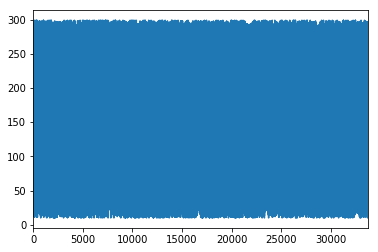

In [82]:
data['air_pollution_index'].plot()
plt.show()

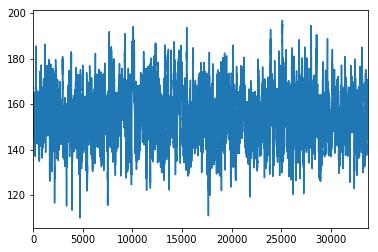

In [83]:
data['air_pollution_index'].rolling(50).mean().plot()
plt.show()

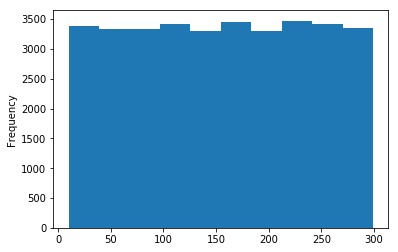

In [84]:
# Histogram
data['air_pollution_index'].plot(kind='hist')
plt.show()

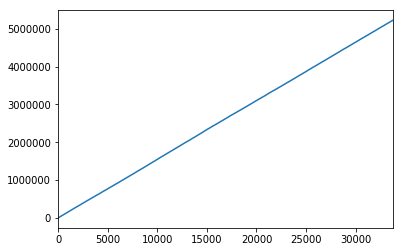

In [85]:
# PDF
new = data['air_pollution_index'].cumsum()
new.plot()
plt.show()

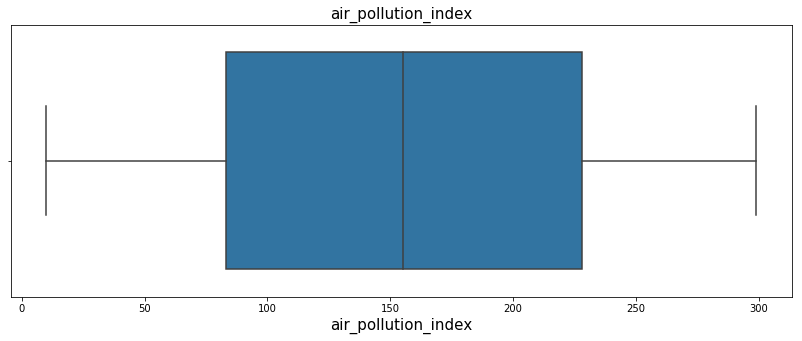

In [86]:
#Box-plot
fig, ax = plt.subplots(figsize=(14,5))
plt.title('air_pollution_index', fontsize=15)
sns.boxplot(data['air_pollution_index'],showfliers=False)
ax.set_xlabel('air_pollution_index',fontsize=15)

plt.show()

We can see most of the values lie between 200 and 235

## 1.13 traffic_volume

In [87]:
data['traffic_volume'].head()

0    5545
1    4516
2    4767
3    5026
4    4918
Name: traffic_volume, dtype: int64

In [88]:
data['traffic_volume'].describe()

count    33750.000000
mean      3240.118163
std       1991.487289
min          0.000000
25%       1165.250000
50%       3335.000000
75%       4926.000000
max       7280.000000
Name: traffic_volume, dtype: float64

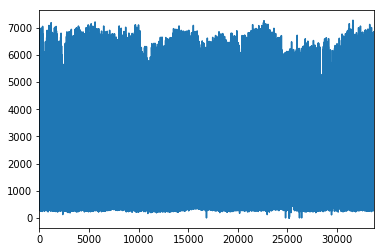

In [89]:
data['traffic_volume'].plot()
plt.show()

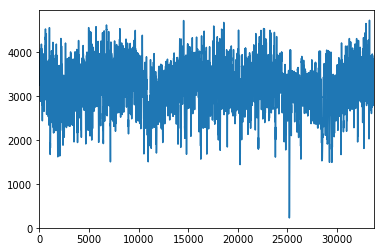

In [90]:
data['traffic_volume'].rolling(50).mean().plot()
plt.show()

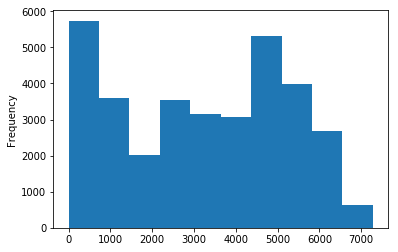

In [91]:
data['traffic_volume'].plot(kind='hist')
plt.show()

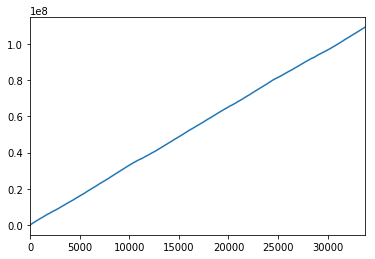

In [92]:
# PDF
new = data['traffic_volume'].cumsum()
new.plot()
plt.show()

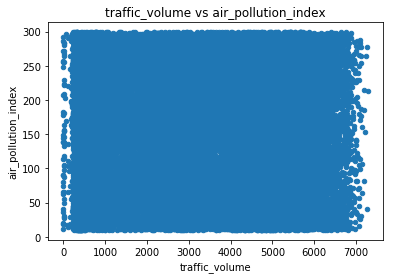

In [93]:
# Scatter plot: snow_p_h vs air_pollution_index

data.plot.scatter(x='traffic_volume', y='air_pollution_index')
plt.title('traffic_volume vs air_pollution_index')
plt.show()

# 2. Correlation Between Features/Variables

In [102]:
y = data['air_pollution_index'] # air_pollution_index is the target variable
x = data.drop(['date_time', 'air_pollution_index'], axis=1)
x.head()

,is_holiday,humidity,wind_speed,wind_direction,visibility_in_miles,dew_point,temperature,rain_p_h,snow_p_h,clouds_all,weather_type,traffic_volume
0,None,89,2,329,1,1,288.28,0.0,0.0,40,Clouds,5545
1,None,67,3,330,1,1,289.36,0.0,0.0,75,Clouds,4516
2,None,66,3,329,2,2,289.58,0.0,0.0,90,Clouds,4767
3,None,66,3,329,5,5,290.13,0.0,0.0,90,Clouds,5026
4,None,65,3,329,7,7,291.14,0.0,0.0,75,Clouds,4918


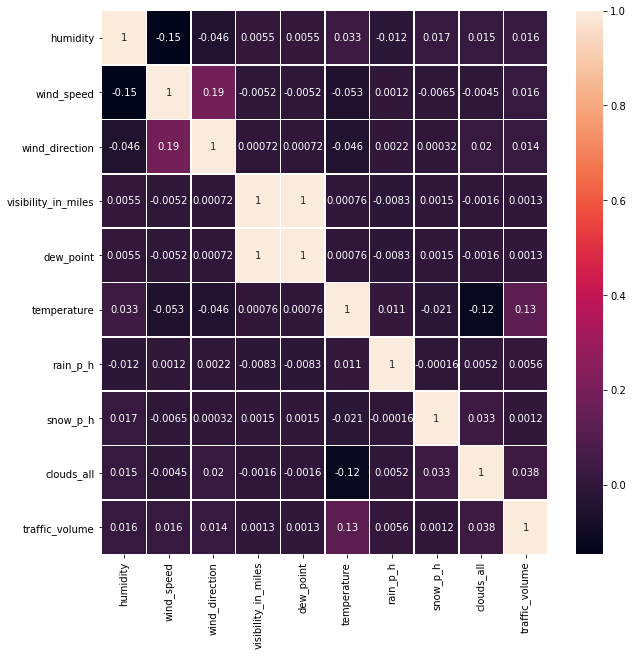

In [103]:
# Correlation Heatmap

columns = list(x.columns)
plt.figure(figsize = (10, 10))
sns.heatmap(data[columns].corr(), annot = True, linewidth = 0.5)
plt.show()

We can see that visibility_in_miles and dew_point are correlated. It'll be good to remove a correlated features before applying models

In [104]:
# variance_inflation_factor

def variance_inflation_factors(exog_df):
    '''https://stackoverflow.com/questions/42658379/variance-inflation-factor-in-python'''
    exog_df = add_constant(exog_df)
    vifs = pd.Series(
        [1 / (1. - OLS(exog_df[col].values, 
                       exog_df.loc[:, exog_df.columns != col].values).fit().rsquared) 
         for col in exog_df],
        index=exog_df.columns,
        name='VIF'
    )
    return vifs

In [105]:
# Only numerical data should be passed to variance_inflation_factor

new_data = x.drop(['is_holiday', 'weather_type'], axis=1)
new_data.head()

,humidity,wind_speed,wind_direction,visibility_in_miles,dew_point,temperature,rain_p_h,snow_p_h,clouds_all,traffic_volume
0,89,2,329,1,1,288.28,0.0,0.0,40,5545
1,67,3,330,1,1,289.36,0.0,0.0,75,4516
2,66,3,329,2,2,289.58,0.0,0.0,90,4767
3,66,3,329,5,5,290.13,0.0,0.0,90,5026
4,65,3,329,7,7,291.14,0.0,0.0,75,4918


In [106]:
variance_inflation_factors(new_data)

C:\Users\hp\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:49: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  data_klasses = (pandas.Series, pandas.DataFrame, pandas.Panel)
C:\Users\hp\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in double_scalars
  if __name__ == '__main__':


const                  486.888130
humidity                 1.024100
wind_speed               1.061542
wind_direction           1.040288
visibility_in_miles           inf
dew_point                     inf
temperature              1.039126
rain_p_h                 1.000415
snow_p_h                 1.001662
clouds_all               1.019608
traffic_volume           1.020711
Name: VIF, dtype: float64

From the above variance_inflation_factors and correlation matrix we can see that 'visibility_in_miles' and 'dew_point' are correlated. Removing one of those features

In [107]:
# Removing visibility_in_miles

x = x.drop('visibility_in_miles', axis=1)
x.head()

,is_holiday,humidity,wind_speed,wind_direction,dew_point,temperature,rain_p_h,snow_p_h,clouds_all,weather_type,traffic_volume
0,None,89,2,329,1,288.28,0.0,0.0,40,Clouds,5545
1,None,67,3,330,1,289.36,0.0,0.0,75,Clouds,4516
2,None,66,3,329,2,289.58,0.0,0.0,90,Clouds,4767
3,None,66,3,329,5,290.13,0.0,0.0,90,Clouds,5026
4,None,65,3,329,7,291.14,0.0,0.0,75,Clouds,4918


# 3. Data Preperation for Models

## 3.1 Splitting Data

In [108]:
# Splitting data

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y)

In [109]:
print(x_train.shape)
print(y_train.shape)

(27000, 11)
(27000,)


In [110]:
print(x_test.shape)
print(y_test.shape)

(6750, 11)
(6750,)


In [111]:
x_train.head()

,is_holiday,humidity,wind_speed,wind_direction,dew_point,temperature,rain_p_h,snow_p_h,clouds_all,weather_type,traffic_volume
9481,None,99,3,295,1,284.60,1.02,0.0,92,Rain,4989
33155,None,42,8,280,8,282.96,0.00,0.0,1,Clear,5206
12179,None,100,5,350,3,261.38,0.00,0.0,90,Clouds,2755
28698,None,70,5,320,8,275.96,0.00,0.0,90,Rain,5949
4747,None,74,6,270,8,266.01,0.00,0.0,1,Clear,2573


In [112]:
y_train.head()

9481     279
33155    215
12179    129
28698    227
4747     264
Name: air_pollution_index, dtype: int64

## 3.2 Vectorizing Categorical Data

In [113]:
# Vectorizing weather_type

weather_vectorizer = CountVectorizer()

weather_train = weather_vectorizer.fit_transform(x_train['weather_type'].values)
weather_test = weather_vectorizer.transform(x_test['weather_type'].values)

print(weather_train.shape)
print(weather_test.shape)

(27000, 11)
(6750, 11)


In [114]:
# Vectorizing is_holiday

holiday_vectorizer = CountVectorizer()

holiday_train = holiday_vectorizer.fit_transform(x_train['is_holiday'].values)
holiday_test = holiday_vectorizer.transform(x_test['is_holiday'].values)

print(holiday_train.shape)
print(holiday_test.shape)


(27000, 19)
(6750, 19)


## 3.3 Normalizing Numerical Data

In [115]:
# humidity
normalizer = Normalizer()

humidity_train = x_train['humidity'].values.reshape(-1, 1)
humidity_test = x_test['humidity'].values.reshape(-1, 1)

humidity_train = normalizer.fit_transform(humidity_train)
humidity_test = normalizer.transform(humidity_test)

print(humidity_train.shape)
print(humidity_test.shape)

(27000, 1)
(6750, 1)


In [116]:
# wind_speed

normalizer = Normalizer()

wind_speed_train = x_train['wind_speed'].values.reshape(-1, 1)
wind_speed_test = x_test['wind_speed'].values.reshape(-1, 1)

wind_speed_train = normalizer.fit_transform(wind_speed_train)
wind_speed_test = normalizer.transform(wind_speed_test)

print(wind_speed_train.shape)
print(wind_speed_test.shape)

(27000, 1)
(6750, 1)


In [117]:
# wind_direction

normalizer = Normalizer()

wind_direction_train = x_train['wind_direction'].values.reshape(-1, 1)
wind_direction_test = x_test['wind_direction'].values.reshape(-1, 1)

wind_direction_train = normalizer.fit_transform(wind_direction_train)
wind_direction_test = normalizer.transform(wind_direction_test)

print(wind_direction_train.shape)
print(wind_direction_test.shape)

(27000, 1)
(6750, 1)


In [118]:
# dew_point

normalizer = Normalizer()

dew_point_train = x_train['dew_point'].values.reshape(-1, 1)
dew_point_test = x_test['dew_point'].values.reshape(-1, 1)

dew_point_train = normalizer.fit_transform(dew_point_train)
dew_point_test = normalizer.transform(dew_point_test)

print(dew_point_train.shape)
print(dew_point_test.shape)

(27000, 1)
(6750, 1)


In [119]:
# temperature

normalizer = Normalizer()

temperature_train = x_train['temperature'].values.reshape(-1, 1)
temperature_test = x_test['temperature'].values.reshape(-1, 1)

temperature_train = normalizer.fit_transform(temperature_train)
temperature_test = normalizer.transform(temperature_test)

print(temperature_train.shape)
print(temperature_test.shape)

(27000, 1)
(6750, 1)


In [120]:
# rain_p_h

normalizer = Normalizer()

rain_p_h_train = x_train['rain_p_h'].values.reshape(-1, 1)
rain_p_h_test = x_test['rain_p_h'].values.reshape(-1, 1)

rain_p_h_train = normalizer.fit_transform(rain_p_h_train)
rain_p_h_test = normalizer.transform(rain_p_h_test)

print(rain_p_h_train.shape)
print(rain_p_h_test.shape)

(27000, 1)
(6750, 1)


In [121]:
# snow_p_h

normalizer = Normalizer()

snow_p_h_train = x_train['snow_p_h'].values.reshape(-1, 1)
snow_p_h_test = x_test['snow_p_h'].values.reshape(-1, 1)

snow_p_h_train = normalizer.fit_transform(snow_p_h_train)
snow_p_h_test = normalizer.transform(snow_p_h_test)

print(snow_p_h_train.shape)
print(snow_p_h_test.shape)

(27000, 1)
(6750, 1)


In [122]:
# clouds_all

normalizer = Normalizer()

clouds_all_train = x_train['clouds_all'].values.reshape(-1, 1)
clouds_all_test = x_test['clouds_all'].values.reshape(-1, 1)

clouds_all_train = normalizer.fit_transform(clouds_all_train)
clouds_all_test = normalizer.transform(clouds_all_test)

print(clouds_all_train.shape)
print(clouds_all_test.shape)

(27000, 1)
(6750, 1)


In [123]:
# traffic_volume

normalizer = Normalizer()

traffic_volume_train = x_train['traffic_volume'].values.reshape(-1, 1)
traffic_volume_test = x_test['traffic_volume'].values.reshape(-1, 1)

traffic_volume_train = normalizer.fit_transform(traffic_volume_train)
traffic_volume_test = normalizer.transform(traffic_volume_test)

print(traffic_volume_train.shape)
print(traffic_volume_test.shape)

(27000, 1)
(6750, 1)


## 3.4 Stacking Data

In [124]:
# Stacking

x_train = hstack((weather_train, holiday_train, humidity_train, wind_speed_train, wind_direction_train, dew_point_train, \
                  temperature_train, rain_p_h_train, snow_p_h_train, clouds_all_train, traffic_volume_train))

x_test = hstack((weather_test, holiday_test, humidity_test, wind_speed_test, wind_direction_test, dew_point_test, \
                 temperature_test, rain_p_h_test, snow_p_h_test, clouds_all_test, traffic_volume_test))

In [125]:
# Checking the type of x_train and x_test

print(type(x_train))
print(type(x_test))

<class 'scipy.sparse.coo.coo_matrix'>
<class 'scipy.sparse.coo.coo_matrix'>


In [126]:
# x_train, x_test are in sparse coo_matrix format. Converting x_train and x_test to numpy array
x_train = x_train.toarray()
x_test = x_test.toarray()

print(type(x_train))
print(type(x_test))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [127]:
# Checking the type of y_train and y_test

print(type(y_train))
print(type(y_test))

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In [128]:
# y_train, y_test are in Pandas.Series format. Converting y_train, y_test to numpy arrays

y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

print(type(y_train))
print(type(y_test))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [129]:
print(x_train.shape)
print(y_train.shape)

(27000, 39)
(27000,)


In [130]:
print(x_test.shape)
print(y_test.shape)

(6750, 39)
(6750,)


# 4. Machine Learning Models

## 4.1 Random Forest Regressor

In [131]:
clf = RandomForestRegressor()
clf.fit(x_train, y_train)

C:\Users\hp\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [132]:
y_train_pred = clf.predict(x_train)
y_test_pred = clf.predict(x_test)

In [133]:
# Train Mean_squared_error

train_mse = mean_squared_error(y_train, y_train_pred)
print('Train MSE: ', train_mse)


# Train Mean_absolute_error

train_mae = mean_absolute_error(y_train, y_train_pred)
print('Train MAE', train_mae)

Train MSE:  6983.851096028321
Train MAE 72.2998676136073


In [134]:
# Test Mean_squared_error

test_mse = mean_squared_error(y_test, y_test_pred)
print('Test MSE: ', test_mse)

# Test Mean_absolute_error

test_mae = mean_absolute_error(y_test, y_test_pred)
print('Test MAE', test_mae)

Test MSE:  7050.501060342259
Test MAE 72.68769214732906


## 4.2 SGD Regressor

In [135]:
clf = SGDRegressor(loss='squared_loss', penalty='elasticnet')
clf.fit(x_train, y_train)

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty='elasticnet', power_t=0.25,
             random_state=None, shuffle=True, tol=0.001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [136]:
# Making predictions on Train and Test data

y_train_pred = clf.predict(x_train)
y_test_pred = clf.predict(x_test)

In [137]:
# Train Mean_squared_error

train_mse = mean_squared_error(y_train, y_train_pred)
print('Train MSE: ', train_mse)


# Train Mean_absolute_error

train_mae = mean_absolute_error(y_train, y_train_pred)
print('Train MAE', train_mae)

Train MSE:  7008.431765058241
Train MAE 72.4918544326158


In [138]:
# Test Mean_squared_error

test_mse = mean_squared_error(y_test, y_test_pred)
print('Test MSE: ', test_mse)

# Test Mean_absolute_error

test_mae = mean_absolute_error(y_test, y_test_pred)
print('Test MAE', test_mae)

Test MSE:  7025.980732182868
Test MAE 72.5926234244649


## 4.3 XGBRegressor

In [139]:
clf = XGBRegressor()
clf.fit(x_train, y_train)

[11:16:39] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [140]:
# Making predictions on Train and Test data

y_train_pred = clf.predict(x_train)
y_test_pred = clf.predict(x_test)

In [141]:
# Train Mean_squared_error

train_mse = mean_squared_error(y_train, y_train_pred)
print('Train MSE: ', train_mse)


# Train Mean_absolute_error

train_mae = mean_absolute_error(y_train, y_train_pred)
print('Train MAE', train_mae)

Train MSE:  6992.2669804802445
Train MAE 72.39532120810615


In [142]:
# Test Mean_squared_error

test_mse = mean_squared_error(y_test, y_test_pred)
print('Test MSE: ', test_mse)

# Test Mean_absolute_error

test_mae = mean_absolute_error(y_test, y_test_pred)
print('Test MAE', test_mae)

Test MSE:  7033.767203113547
Test MAE 72.6288177863227


## 4.4 Deep Learning Model

In [144]:
# Sequential Model

model = Sequential()
model.add(Dense(128, activation='relu', input_dim=x_train.shape[1] ))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(1))

model.compile(loss='mse', optimizer='adam', metrics=['mae', 'mse'])

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.


In [145]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               5120      
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 65        
Total params: 17,601
Trainable params: 17,601
Non-trainable params: 0
_________________________________________________________________


In [146]:
%%time
history = model.fit(x_train, y_train, batch_size=64, epochs=20, validation_data = (x_test, y_test), verbose=2)

Train on 27000 samples, validate on 6750 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/20
 - 4s - loss: 10467.0374 - mean_absolute_error: 84.3652 - mean_squared_error: 10467.0391 - val_loss: 7212.9887 - val_mean_absolute_error: 73.3356 - val_mean_squared_error: 7212.9893
Epoch 2/20
 - 2s - loss: 7528.5026 - mean_absolute_error: 74.2868 - mean_squared_error: 7528.5039 - val_loss: 7078.4334 - val_mean_absolute_error: 72.8059 - val_mean_squared_error: 7078.4326
Epoch 3/20
 - 2s - loss: 7560.6483 - mean_absolute_error: 74.3619 - mean_squared_error: 7560.6460 - val_loss: 7044.2534 - val_mean_absolute_error: 72.6755 - val_mean_squared_error: 7044.2549
Epoch 4/20
 - 2s - loss: 7518.7681 - mean_absolute_error: 74.2357 - mean_squared_error: 7518.7666 - val_loss: 7064.7664 - val_mean_absolute_error: 72.7774 - val_mean_squared_error: 7064.7651
Epoch 5/20
 - 2s - loss: 7528.6873 - mean_absolute_error: 74.3026 - mean_squared_error: 7528.6870 - val_loss: 7173.8350 - val_mean_absolu

In [148]:
# Making predictions on Train and Test data

y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)

In [149]:
# Train Mean_squared_error

train_mse = mean_squared_error(y_train, y_train_pred)
print('Train MSE: ', train_mse)


# Train Mean_absolute_error

train_mae = mean_absolute_error(y_train, y_train_pred)
print('Train MAE', train_mae)

Train MSE:  7057.646577586786
Train MAE 72.6773230537132


In [150]:
# Test Mean_squared_error

test_mse = mean_squared_error(y_test, y_test_pred)
print('Test MSE: ', test_mse)

# Test Mean_absolute_error

test_mae = mean_absolute_error(y_test, y_test_pred)
print('Test MAE', test_mae)

Test MSE:  7093.908513192237
Test MAE 72.8842301884404


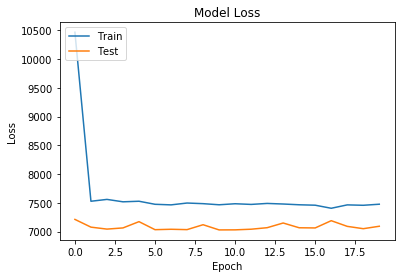

In [151]:
# Reference https://keras.io/visualization/

# Plot training & validation loss values

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


## Models Comparison

In [155]:
x = PrettyTable()

x. field_names = ['Model', 'Train MSE', 'Test MSE', 'Train MAE', 'Test MAE']

x.add_row(['RandomForestRegressor', '6983.85', '7050.50', '72.29', '72.68'])
x.add_row(['SGDRegressor', '7008.43', '7025.98','72.49', '72.59'])
x.add_row(['XGBRegressor', '6992.26', '7033.76', '72.39', '72.62'])
x.add_row(['Deep Learning Model', '7057.64', '7093.90','72.67', '72.88'])

print(x)

+-----------------------+-----------+----------+-----------+----------+
|         Model         | Train MSE | Test MSE | Train MAE | Test MAE |
+-----------------------+-----------+----------+-----------+----------+
| RandomForestRegressor |  6983.85  | 7050.50  |   72.29   |  72.68   |
|      SGDRegressor     |  7008.43  | 7025.98  |   72.49   |  72.59   |
|      XGBRegressor     |  6992.26  | 7033.76  |   72.39   |  72.62   |
|  Deep Learning Model  |  7057.64  | 7093.90  |   72.67   |  72.88   |
+-----------------------+-----------+----------+-----------+----------+
